# Sandbox Projector calibration
In this tutorial we will learn the basic steps to set up the projector for the _open AR Sandbox_. 
This not only involves tweaking of calibration parameters, but also the adjustment of your hardware component.

Let's start with importing the main module:

In [1]:
#Only useful when sandbox is not installed
import os,sys
sys.path.append('../../../')
#
from sandbox import _calibration_dir
from sandbox.projector import Projector


### Before starting:
The Sandbox consists of several core components (classes) which need to be initialized and can be all adjusted according to the hardware setup, your visualization preferences or different model inputs.

**Projector**: This is actually a dashboard with the main frame (displaying the model map), as well as optional areas for a legend, a profile view or an interactive control area.

The Projector components are standardised.We start by creating an instance of the Projector Class. Here we already need to supply the resolution of our projector hardware, e.g. 1280x800 pixel.

In [2]:
#use_panel = True will open automatically a panel server 
proj = Projector(use_panel=True, p_width=1280, p_height=800, show_legend=True, show_colorbar=True)

Launching server at http://localhost:38683
Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


The projector cretes a matplotlib figure with its corresponding axes. You can use these axes as you want and display whatever plot, image, or text in the figure. Just remember to trigger the update in the panel to refresh the image. Run the cell below to see an example.

In [3]:
figure = proj.figure
axes = proj.ax
# Minimal example of plotting a line 
axes.plot([10,20],[50,50], 'r-*', label="line")
# Trigger the update in the sandbox panel
proj.trigger()

True

In [4]:
# To clean the axes from the figure
proj.clear_axes()

True

**For more information:** Please visit [matplotlib](https://matplotlib.org/) for more information on how to use axes 

**Adjust your hardware**


Please adjust the projector in a way, that at least the whole sandbox including the four corner poles are covered by the iluminated area. Make sure that the borders of the sandbox are parallel to the borders of the sandbox. If necessary, rotate the projector and adjust the keystone correction until the projected image is parallel to all boarders of the sandbox. Some projectors assist you with a test picture that can be switched on in the options. Depending on the color of the sand you use, you can additionally adjust the color temperature of your projector to get better colour representations. If you wish to use some additional projection areas (e.g. a legend), increase the iluminated area in order to have enough space on a panel outside the box. Also it is important that the projected area is as close to a square as possible. 

**Adjust the software**

The following command starts a calibration panel inside this notebook. You can use the four sliders until the main frame exactly covers the entire sandbox. Start with the upper left corner. Adjust the top and left margin sliders to shift the main frames position up and down and left and right. Next, use the last two sliders to adjust the size (width and height) of the main frame.

In [5]:
widget = proj.calibrate_projector()
widget


Column
    [0] Markdown(str)
    [1] IntSlider(end=780, name='Main frame top margin', value=50, value_throttled=50)
    [2] IntSlider(end=1260, name='Main frame left margin', value=50, value_throttled=50)
    [3] IntSlider(end=1280, name='Main frame width', start=10, value=700, value_throttled=700)
    [4] IntSlider(end=800, name='Main frame height', start=10, value=500, value_throttled=500)
    [5] Markdown(str)
    [6] TextInput(name='Choose a calibration f..., value='/home/danielsk78/GitProje...)
    [7] Button(name='Save calibration')

## (optional) Sidebar

Is possible to include a sidebar including a colorbar, legend, profile area or box to add any additional information you want to be displayed. This information will be saved in the calibration file and can be used for any module.

### Colorbar

A colorbar can de added to the right side or at the bottom of the principal frame. In the widgets, you need to change the orientation of the colorbar for this, and set the sliders to fit the area dedicated to the colorbar. For here you can set a customizable label to be added to the colorbar.

In [6]:
proj.show_widget_colorbar()

Row
    [0] Column
        [0] Markdown(str)
        [1] Checkbox(name='Show colorbar', value=True)
        [2] TextInput(name='Label of colorbar')
        [3] Button(button_type='success', name='Refresh label')
    [1] Column
        [0] Select(name='Orientation Colorbar', options=['vertical', '...], value='vertical')
        [1] IntSlider(end=780, name='Top space', value_throttled=0)
        [2] IntSlider(end=1260, name='Left space', value_throttled=0)
        [3] IntSlider(end=1280, name='Width Colorbar', start=1, value=70, value_throttled=70)
        [4] IntSlider(end=800, name='Height colorbar', start=1, value=500, value_throttled=500)
        [5] ColorPicker(name='Color background c..., value='#2896A5')

The sandbox will take care of getting the vmin, vmax and colormap when the main thread of the sandbox is running

In [7]:
proj.set_colorbar(vmin = 0, vmax = 100, cmap = "magma", label = "Custom" )

### Legend

Is possible to show the legends of the information plotted; like the Aruco markers. The following shows a minimal example where the handles and the labels of another figure are added to the sandbox. 

In [8]:
proj.show_widget_legend()

Row
    [0] Column
        [0] Markdown(str)
        [1] Checkbox(name='Show legend', value=True)
        [2] Button(button_type='success', name='Refresh legend')
    [1] Column
        [0] IntSlider(end=780, name='Top space', value_throttled=0)
        [1] IntSlider(end=1260, name='Left space', value_throttled=0)
        [2] IntSlider(end=1280, name='Width Legend', start=1, value=175, value_throttled=175)
        [3] IntSlider(end=800, name='Height Legend', start=1, value=233, value_throttled=233)
        [4] ColorPicker(name='Color background c..., value='#16425B')

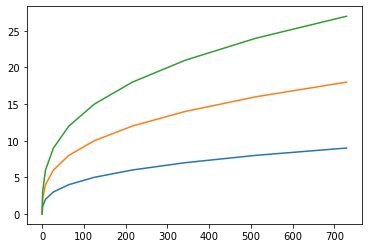

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = np.arange(10)
for i in range(3):
    ax.plot(x**3, x * (i+1), label='line %d' % i) 

In [10]:
handles, labels = ax.get_legend_handles_labels()

In [11]:
proj.set_legend(handles = handles, labels = labels)

There are many other Matplotlib objects that can be used in this way. 

In [12]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='b', lw=4, label='Line'),
                   Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='g', markersize=15),
                   Patch(facecolor='orange', edgecolor='r',
                         label='Color Patch')]
proj.set_legend(legend_elements)

We can do the same with the sandbox frame. But now the handles and labels are internally stored by the sandbox. 

In [13]:
for i in range(3):
    proj.ax.plot(x, x * (i+1), label='Another line %d' % i) 
proj.trigger()
proj.set_legend()

## Save calibration
Once the projection fits the sandbox we can save the current calibration in order to use this calibration for future usages and not to go through the whole process again, you can simply save the calibration in a human-readable JSON file. Also include this file in bug reports to help us improve the Open AR Sandbox.

In [ ]:
proj.save_json(file = _calibration_dir + 'my_projector_calibration.json')

Now use the following line to open the calibrated projector. 

In [ ]:
proj = Projector(calibprojector=_calibration_dir + 'my_projector_calibration.json', 
                 use_panel=True, 
                 show_colorbar=True,
                show_legend=True)